In [118]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [119]:
file = 'cell_files/BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg4_ABSreadcount_divisioned.txt_CSxOut.txt_BL14mixture_output.txt'

cell = 'mNeu'
cell_real = 'mNeu_real'

ran_vals = np.linspace(0, 1, num=6)
print(ran_vals)

num_groups = 5

[0.  0.2 0.4 0.6 0.8 1. ]


In [120]:
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)
    
df['Index Number'] = [int(i.split('insilmix')[-1]) for i in df.index]

df.sort_values(['Index Number'], inplace=True)
df = df.drop('Index Number', axis=1)

for col in df.columns:
    if 'real' not in col:
        df[col] = np.array(df[col]) * 100

In [121]:
def generate_lists(df, cell_name, cell_name_real):
    num = 0
    avg_vals_real = []
    avg_vals = []
    avg_lst_real = np.zeros(num_groups)
    avg_lst = np.zeros(num_groups)
    avg_lsts = []
    avg_lsts_real = []

    mNeu_arr = np.array(df[cell_name])
    mNeu_arr_real = np.array(df[cell_name_real])
    for i in range(len(df)):
        if num == num_groups:
            avg_vals.append(np.mean(avg_lst))
            avg_vals_real.append(np.mean(avg_lst_real))
            avg_lsts.append(avg_lst)
            avg_lsts_real.append(avg_lst_real)
            avg_lst_real = np.zeros(num_groups)
            avg_lst = np.zeros(num_groups)
            num = 0
        avg_lst[num] = mNeu_arr[i]
        avg_lst_real[num] = mNeu_arr_real[i]
        num += 1
    
    avg_vals.append(np.mean(avg_lst))
    avg_vals_real.append(np.mean(avg_lst_real))
    avg_lsts.append(avg_lst)
    avg_lsts_real.append(avg_lst_real)

    return avg_vals_real, avg_lsts

In [122]:
avg_real, avg_val_lst = generate_lists(df, cell, cell_real)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.2 0.  0.  0.  0.  0.2 0.  0.  0. ]
[0.2 0.4 0.2 0.2 0.4 0.4 0.4 0.4 0.6 0.2]
[0.4 0.8 0.4 0.6 0.6 0.8 1.  0.8 0.6 0.8]
[1.  1.  1.  0.6 1.  1.  1.  1.  1.  1. ]


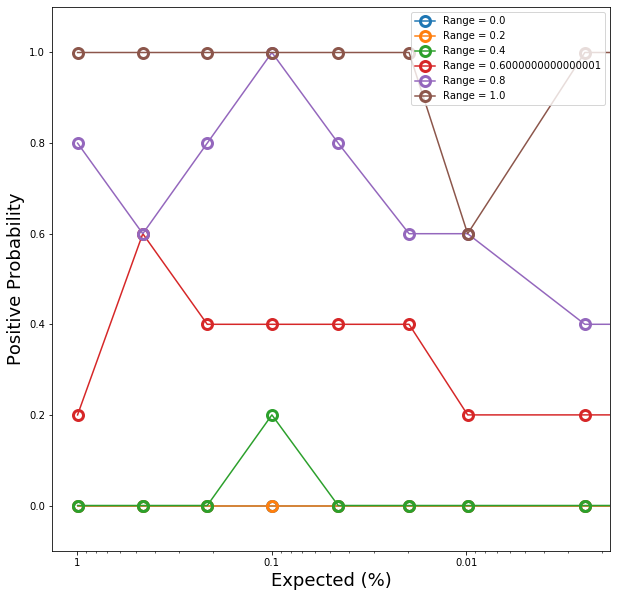

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for ran in ran_vals:
    pos_lst = np.zeros(len(avg_val_lst))
    for i in range(len(avg_val_lst)):
        pos = 0
        for j in range(len(avg_val_lst[i])):
            val = avg_real[i]
            test = avg_val_lst[i][j]
            if (test >= val - ran) and (test <= val + ran):
                pos += 1
        pos_lst[i] = pos / num_groups
    print(pos_lst)
    ax.plot(np.array(avg_real), pos_lst, label='Range = ' + str(ran), marker='o', mew=3, ms=10, fillstyle='none')

plt.ylim(-0.1, 1.1)
plt.legend()
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_xlabel('Expected (%)', fontsize=18)
ax.set_ylabel('Positive Probability', fontsize=18)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))

fig.savefig('plot_i.pdf',dpi=300, bbox_inches='tight')

In [33]:
pos_lst

array([0.4, 0.8, 0.4, 0.6, 0.6, 0.6, 1. , 0.8, 0.6, 0.4])

(0, 1.1)

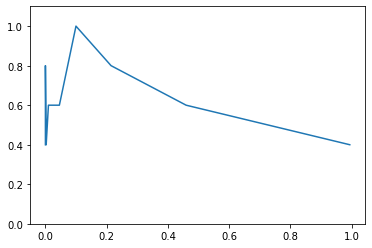

In [73]:
667 * (10/19)

351.05263157894734

In [74]:
667 * (6/19) + 667 * (3/19) * (1/2)

263.2894736842105

In [75]:
667 * (3/19) * (1/2)

52.6578947368421